# KE 5018 - Workshop 2B Sentosa Bank Customer Propensity Modelling

## Import libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import myUtilities as mu

from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


## Load data

In [2]:
X = np.load(os.path.join('data', 'x-train.npy'))
y = np.load(os.path.join('data', 'y-train.npy'))

In [3]:
X[0]

array([-1.17710605, -0.86806966,  0.04816959,  0.19313005,  0.39324086,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [4]:
X.shape

(1195, 23)

In [5]:
NN_INPUT = X.shape[1]
NN_INPUT

23

In [6]:
y[:5]

array(['None', 'None', 'None', 'None', 'None'], dtype=object)

In [7]:
y.shape

(1195,)

In [8]:
y_df = pd.get_dummies(y)
y_df.head()

,A,B,None
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
one_hot_y = y_df.values
one_hot_y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ..., 
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

## Fit a base model

In [10]:
# Train-validation split
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.33, random_state=42, stratify=y)

In [11]:
# Model Definition
model = models.Sequential()
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NN_INPUT,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [12]:
# Compile the Model.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the model
history = model.fit(X_train,
                    y_train,
                    epochs=1200,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    verbose=0)

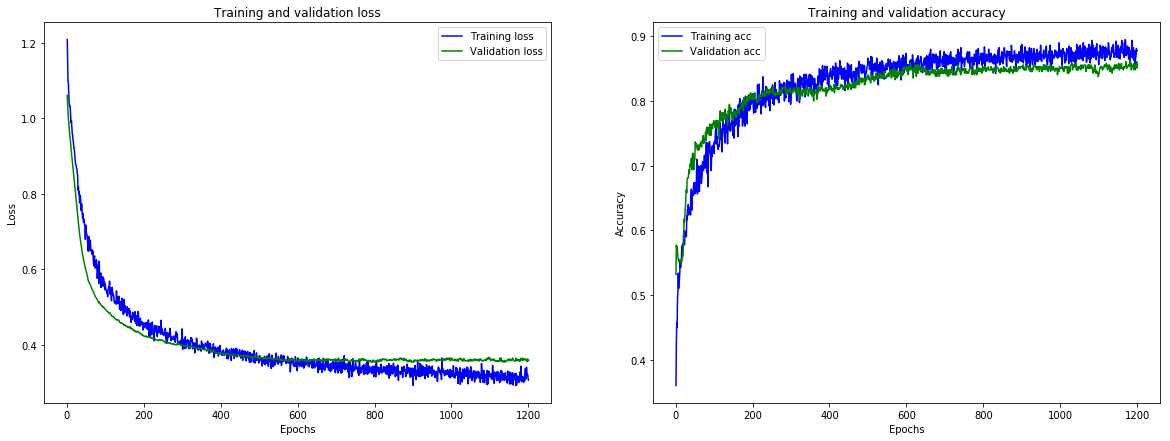

In [14]:
# Plotting the training and validation loss, accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 7))

plt.subplot(121)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(122)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
y_pred = model.predict_classes(X_test)
y_pred

array([0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2,
       1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1,
       0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       2, 0,

In [16]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ..., 
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [17]:
num_y_test = [np.where(r==1)[0][0] for r in y_test]
num_y_test[:5]

[0, 2, 2, 0, 0]

In [18]:
cnf_matrix = confusion_matrix(num_y_test, y_pred)

Confusion matrix, without normalization
[[ 86   0  13]
 [  0  79   0]
 [ 41   5 171]]


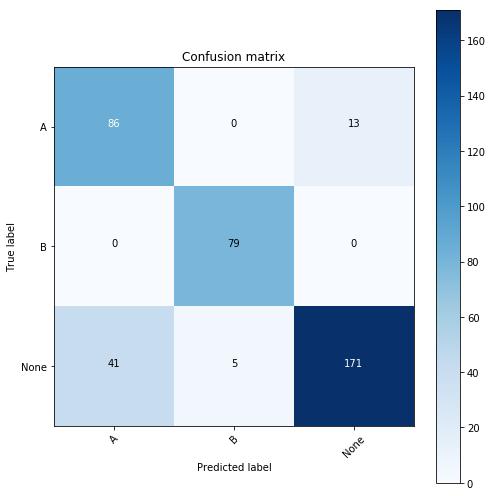

In [19]:
mu.plot_confusion_matrix(cnf_matrix, classes=['A', 'B', 'None'], title='Confusion matrix')

In [20]:
print(classification_report(num_y_test, y_pred, target_names=['A', 'B', 'None']))

             precision    recall  f1-score   support

          A       0.68      0.87      0.76        99
          B       0.94      1.00      0.97        79
       None       0.93      0.79      0.85       217

avg / total       0.87      0.85      0.85       395



## Grid search for a better model

In [21]:
# Range of sizes of neural network for grid search.
param_grid = [
    {'layer1': [16], 'layer2': [16], 'layer3': [0]},
    {'layer1': [32], 'layer2': [16], 'layer3': [0]},
    {'layer1': [32], 'layer2': [32], 'layer3': [0]},
    {'layer1': [32], 'layer2': [16], 'layer3': [8]},
]

In [22]:
# Function to create model, required for KerasClassifier
def create_model_gscv(layer1 = 64, layer2 = 64, layer3 = 64):
    
    # create model
    model = models.Sequential()
    
    # Hidden layers
    model.add(layers.Dense(layer1, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NN_INPUT,)))
    model.add(layers.Dropout(0.5))
    if (layer2 > 0) :
        model.add(layers.Dense(layer2, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
        model.add(layers.Dropout(0.5))
    if (layer3 > 0) :
        model.add(layers.Dense(layer3, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
        model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [23]:
nn_model = KerasClassifier(build_fn=create_model_gscv, epochs=1200, batch_size=128, verbose=0)

In [24]:
# Use 3-fold stratified cross-validation.
grid = GridSearchCV(estimator=nn_model, param_grid=param_grid, n_jobs=1, cv=3, refit=True, verbose=0, return_train_score=True)
grid_result = grid.fit(X, y)

In [25]:
# Summarize results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.823431 using {'layer1': 32, 'layer2': 32, 'layer3': 0}
0.530544 (0.371403) with: {'layer1': 16, 'layer2': 16, 'layer3': 0}
0.818410 (0.035782) with: {'layer1': 32, 'layer2': 16, 'layer3': 0}
0.823431 (0.006458) with: {'layer1': 32, 'layer2': 32, 'layer3': 0}
0.492887 (0.344914) with: {'layer1': 32, 'layer2': 16, 'layer3': 8}


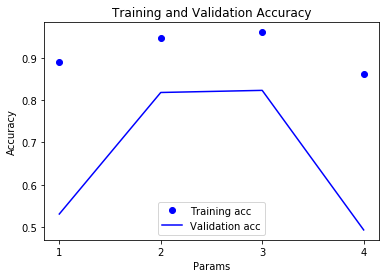

In [26]:
# Plotting the training and validation accuracy
plt.clf()

acc1 = grid_result.cv_results_['mean_train_score']
val_acc1 = grid_result.cv_results_['mean_test_score']

params1 = range(1, len(grid_result.cv_results_['params']) + 1)

plt.plot(params1, acc1, 'bo', label='Training acc')
plt.plot(params1, val_acc1, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Params')
plt.xticks([1, 2, 3, 4])
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Score the best estimator on the test data

In [27]:
X_test = np.load(os.path.join('data', 'x-test.npy'))
y_test = np.load(os.path.join('data', 'y-test.npy'))

In [28]:
y_pred_best = grid_result.predict(X_test)
y_pred_best[:10]

array(['None', 'B', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None'], dtype=object)

In [29]:
le = LabelEncoder()
le.fit(y_pred_best)
num_y_pred_best = le.transform(y_pred_best)
num_y_pred_best[:10]

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
le.classes_

array(['A', 'B', 'None'], dtype=object)

In [31]:
le.transform(['A', 'B', 'None'])

array([0, 1, 2])

In [32]:
num_y = le.transform(y_test)
num_y[:10]

array([2, 2, 1, 2, 2, 2, 0, 2, 0, 2])

Confusion matrix, without normalization
[[  4   0  17]
 [  0   2   7]
 [ 19   8 143]]


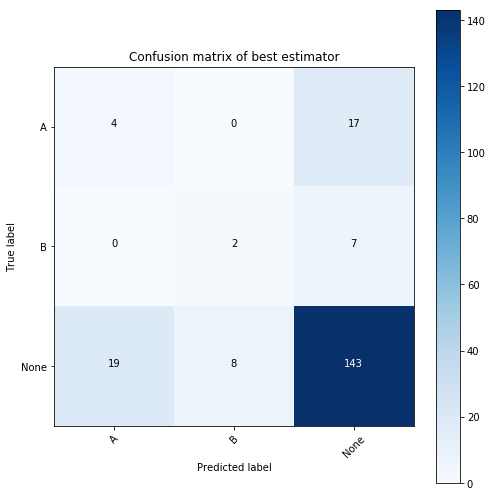

In [33]:
cnf_matrix_best = confusion_matrix(num_y, num_y_pred_best)
mu.plot_confusion_matrix(cnf_matrix_best, classes=['A', 'B', 'None'], title='Confusion matrix of best estimator')

In [34]:
print(classification_report(num_y, num_y_pred_best, target_names=['A', 'B', 'None']))

             precision    recall  f1-score   support

          A       0.17      0.19      0.18        21
          B       0.20      0.22      0.21         9
       None       0.86      0.84      0.85       170

avg / total       0.76      0.74      0.75       200



## Fit the best model to all the data

In [35]:
all_X = np.append(X, X_test, axis=0)
all_y = np.append(y, y_test, axis=0)

In [36]:
all_X.shape

(1395, 23)

In [37]:
all_y.shape

(1395,)

In [38]:
all_y_df = pd.get_dummies(all_y)
all_y_df.head()

,A,B,None
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [39]:
one_hot_all_y = all_y_df.values
one_hot_all_y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ..., 
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [40]:
# Model Definition
final_model = models.Sequential()
final_model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NN_INPUT,)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(3, activation='softmax'))

In [41]:
# Compile the Model.
final_model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [42]:
# Training the model
history = final_model.fit(all_X,
                          one_hot_all_y,
                          epochs=1200,
                          batch_size=128,
                          verbose=0)


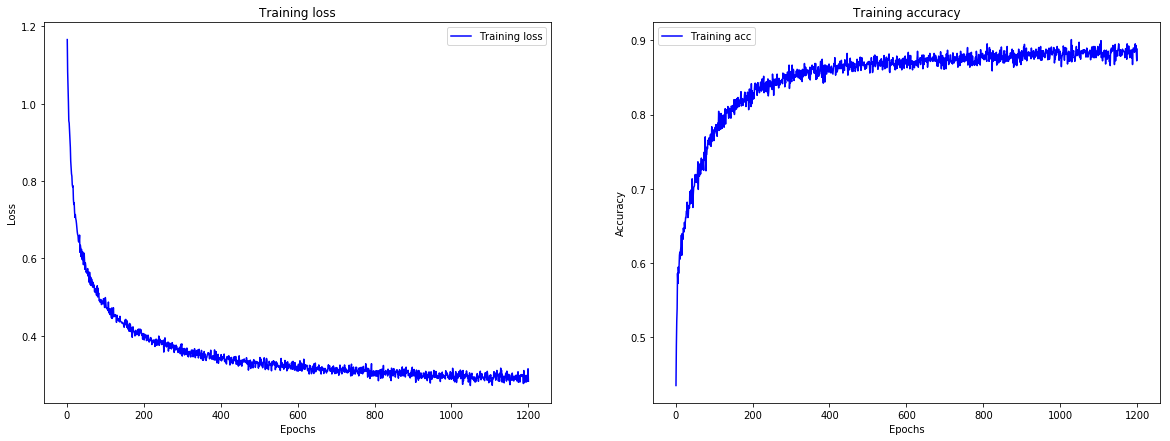

In [43]:
# Plotting the training and validation loss, accuracy
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 7))

plt.subplot(121)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
final_model.save(os.path.join('data', 'final_model.h5'))